In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import codecs
codecs.register_error("strict",codecs.ignore_errors)
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import plotly


In [2]:
#import the file 

clean_data = pd.read_csv(r"C:\Users\FAVOR\Documents\dataset.csv.csv", sep=",",header=0)
clean_data.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,XxYUnited Kingdom☺️
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,ö84406B^,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,&17850.0#,XxYUnited Kingdom☺️
3,536365,84029G,$KNITTED UNION FLAG HOT WATER BOTTLE,6@,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,$RED WOOLLY HOTTIE WHITE HEART.,6@,2010-12-01 08:26:00,3.39,&17850.0#,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2@,2010-12-01 08:26:00,7.65,17850.0,XxYUnited Kingdom☺️
6,536365ä,ö21730^,$GLASS STAR FROSTED T-LIGHT HOLDER,6@,2010-12-01 08:26:00,Ww4.25,&17850.0#,XxYUnited Kingdom☺️
7,536366ä,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366ä,ö22632^,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,XxYUnited Kingdom☺️
9,536367ä,ö84879^,$ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,XxYUnited Kingdom☺️


In [3]:
#check the information of the file

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540884 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   433909 non-null  object
 7   Country      541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [4]:
clean_data.shape

(541909, 8)

In [5]:
clean_data.describe(include='object').T


,count,unique,top,freq
InvoiceNo,541909,44726,573585ä,561
StockCode,541909,7805,85123A,1184
Description,540884,7956,WHITE HANGING HEART T-LIGHT HOLDER,1699
Quantity,541909,1059,1,88742
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114
UnitPrice,541909,2015,1.25,40287
CustomerID,433909,8467,&nan#,27080
Country,541909,76,United Kingdom,248303


In [6]:
#check duplicated rows

clean_data.duplicated().sum()

np.int64(91)

In [7]:
clean_data.drop_duplicates(inplace=True)


In [8]:
clean_data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1025
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     108000
Country             0
dtype: int64

<Axes: >

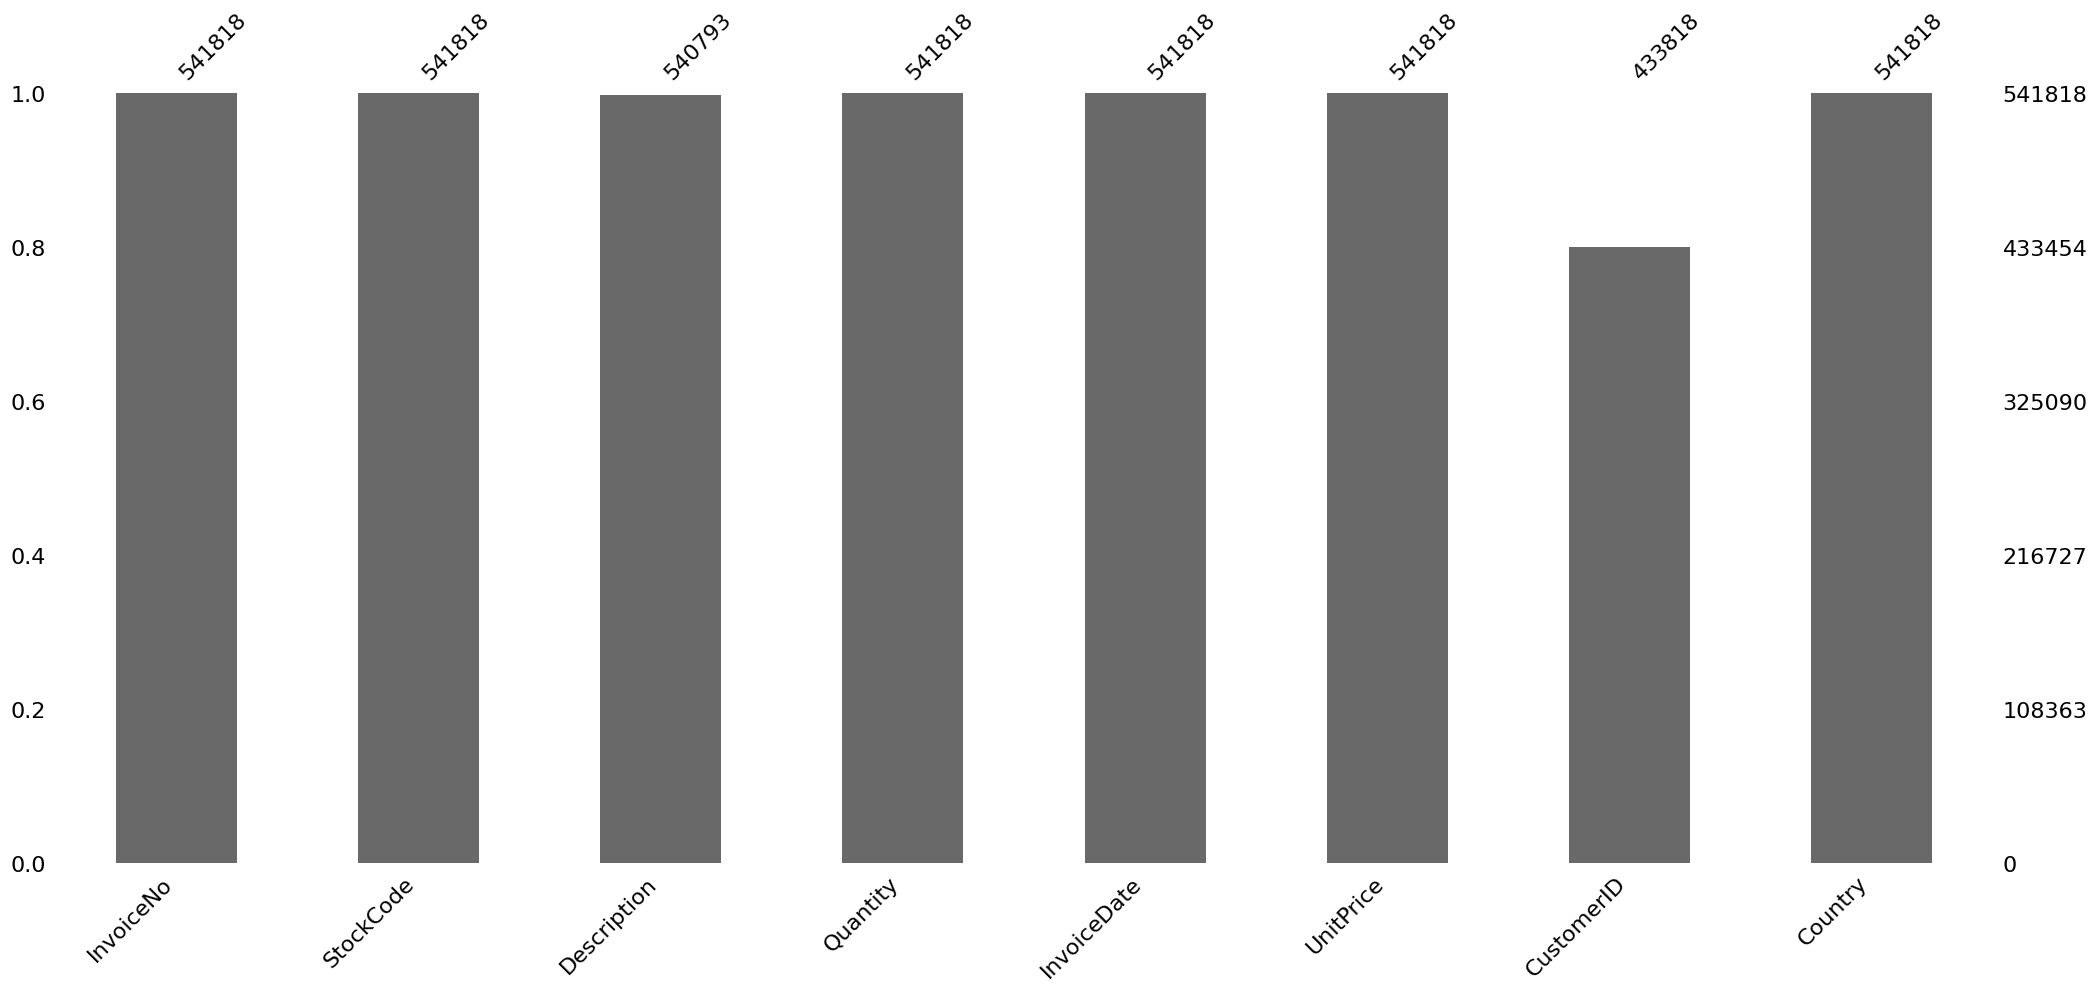

In [9]:
#find the missing data

msno.bar(clean_data)

In [10]:
#check the percentage of the missing data


percentage_of_missing_values = ({"percentage of missing data":clean_data.isna().sum()/len(clean_data)*100})
percentage_of_missing_values

{'percentage of missing data': InvoiceNo       0.000000
 StockCode       0.000000
 Description     0.189178
 Quantity        0.000000
 InvoiceDate     0.000000
 UnitPrice       0.000000
 CustomerID     19.932893
 Country         0.000000
 dtype: float64}

In [11]:
#mode to be able to fill up the missing data

data_des = clean_data["Description"].mode()
data_des

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [12]:
#fill up

data_fill = clean_data['Description'].fillna(value= 'WHITE HANGING HEART T-LIGHT HOLDER', inplace=True)
data_fill

In [13]:
#mode to be able to fill up the missing data

data_stock = clean_data["StockCode"].mode()
data_stock

0    85123A
Name: StockCode, dtype: object

In [14]:
#fill up

data_fill = clean_data['StockCode'].fillna(value= '85123.0', inplace=True)
data_fill

In [15]:
#mode to be able to fill up the missing data

data_id = clean_data['CustomerID'].mode()
data_id

0    &nan#
Name: CustomerID, dtype: object

In [16]:
#fill up

data_fil = clean_data['CustomerID'].fillna(value='&nan#', inplace=True)
data_fil

<Axes: >

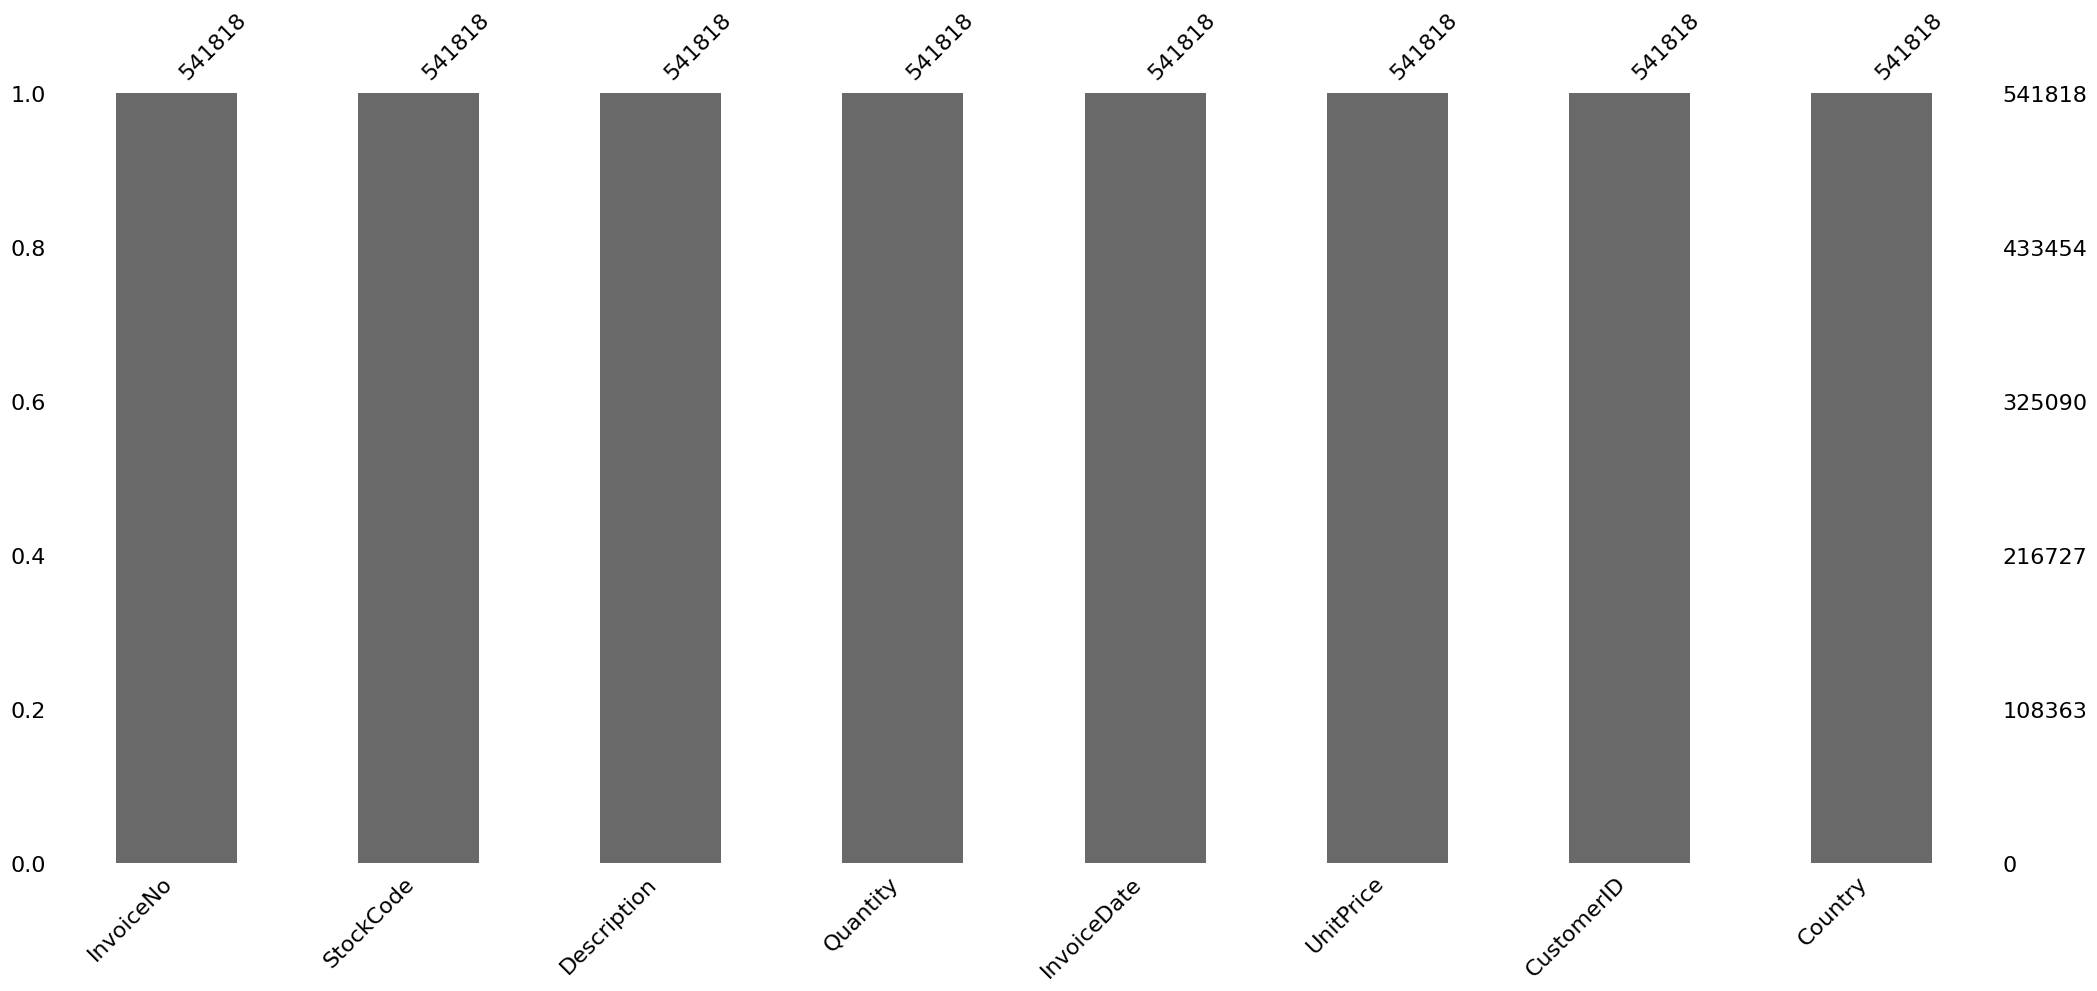

In [17]:
msno.bar(clean_data)

In [18]:
percentage_of_missing_values = ({"percentage of missing data":clean_data.isna().sum()/len(clean_data)*100})
percentage_of_missing_values

{'percentage of missing data': InvoiceNo      0.0
 StockCode      0.0
 Description    0.0
 Quantity       0.0
 InvoiceDate    0.0
 UnitPrice      0.0
 CustomerID     0.0
 Country        0.0
 dtype: float64}

In [19]:
#drop invoice no
clean_data.drop(columns='InvoiceNo', inplace=True)

In [20]:
clean_data.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [21]:
clean_data["CustomerID"] = clean_data["CustomerID"].str.strip("&,#")
clean_data["Description"] = clean_data["Description"].str.strip("-,$,/2")
clean_data["UnitPrice"] = clean_data["UnitPrice"].str.strip("Ww")
clean_data["Quantity"] = clean_data["Quantity"].str.strip("@")
clean_data["Country"] = clean_data["Country"].str.strip("XxY")
clean_data["StockCode"] = clean_data["StockCode"].str.strip("A,B,^,E,G,ö")

In [22]:
pip install pandas emoji

Note: you may need to restart the kernel to use updated packages.


In [23]:
import re
import emoji

# Function to remove emojis and handle special characters like ä, ö
def clean_text(text, preserve_special_chars=True):
    # Remove emojis using regex
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"        # Emoticons
        "\U0001F300-\U0001F5FF"        # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"        # Transport & Map symbols
        "\U0001F700-\U0001F77F"        # Alchemical Symbols
        "\U0001F780-\U0001F7FF"        # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"        # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"        # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"        # Chess Symbols
        "\U0001FA70-\U0001FAFF"        # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"        # Dingbats
        "\U000024C2-\U0001F251"        # Enclosed Characters
        "]+", flags=re.UNICODE)
    
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    
   
    
    return text



# Apply the clean_text function to all text columns
# You can apply it to specific columns by specifying column names or using df.select_dtypes()
for col in clean_data.select_dtypes(include=['object']).columns:  # Apply to string columns only
    clean_data[col] = clean_data[col].apply(clean_text)

# Show the cleaned dataset
print(clean_data.head())




  StockCode                          Description Quantity  \
0     85123   WHITE HANGING HEART T-LIGHT HOLDER        6   
1     71053                  WHITE METAL LANTERN        6   
2     84406       CREAM CUPID HEARTS COAT HANGER        8   
3     84029  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4     84029       RED WOOLLY HOTTIE WHITE HEART.        6   

           InvoiceDate UnitPrice CustomerID         Country  
0  2010-12-01 08:26:00      2.55    17850.0  United Kingdom  
1  2010-12-01 08:26:00      3.39    17850.0  United Kingdom  
2  2010-12-01 08:26:00      2.75    17850.0  United Kingdom  
3  2010-12-01 08:26:00      3.39    17850.0  United Kingdom  
4  2010-12-01 08:26:00      3.39    17850.0  United Kingdom  


In [24]:
clean_data.head(50)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [25]:


# Convert column 'InvoiceDate' from object to int
clean_data['InvoiceDate'] = pd.to_datetime(clean_data['InvoiceDate'], errors='coerce')  # Use errors='coerce' to handle any conversion errors


In [26]:
#getting the time and date colums
clean_data['date'] = clean_data['InvoiceDate'].dt.date
clean_data['Time'] = clean_data['InvoiceDate'].dt.time
clean_data['Year'] = clean_data['InvoiceDate'].dt.year
clean_data.drop(columns=['CustomerID', 'InvoiceDate'], inplace=True)


In [27]:
clean_data['UnitPrice'] = pd.to_numeric(clean_data['UnitPrice'], errors='coerce')
clean_data['Quantity'] = pd.to_numeric(clean_data['Quantity'], errors='coerce')
clean_data['StockCode'] = clean_data['StockCode'].astype(object) #i first changed it to numeric but it didnt change to int instead it changed to float but the numbers are not in decimal places.





In [28]:
#converting date to datetime format

clean_data['date'] = pd.to_datetime(clean_data['date'])

clean_data ['Day'] = clean_data['date'].dt.day
clean_data['Day']

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: Day, Length: 541818, dtype: int32

In [29]:
#stripping month number from date
clean_data['Month'] = clean_data['date'].dt.month
clean_data['Month']

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: Month, Length: 541818, dtype: int32

In [30]:
def find_seasons(monthnumber):
    if monthnumber in [12, 1, 2]:
        return 'Winter'
    elif monthnumber in [3, 4, 5]:
        return 'Spring'
    elif monthnumber in [6, 7, 8]:
        return 'Summer'
    elif monthnumber in [9, 10, 11]:
        return 'Autumn'
    
clean_data['Seasons'] = clean_data['Month'].apply(find_seasons)


In [31]:
clean_data.drop(columns= 'date', inplace=True)

CONVERTING MONTHNUMBER TO MONTHNAME

In [32]:
clean_data['Month'] = pd.to_datetime(clean_data['Month'],format='%m').dt.month_name()


In [33]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541818 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541818 non-null  object 
 1   Description  541818 non-null  object 
 2   Quantity     541818 non-null  int64  
 3   UnitPrice    541818 non-null  float64
 4   Country      541818 non-null  object 
 5   Time         541818 non-null  object 
 6   Year         541818 non-null  int32  
 7   Day          541818 non-null  int32  
 8   Month        541818 non-null  object 
 9   Seasons      541818 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 41.3+ MB


RENAMING QUALITY AND DESCRIPTION COLUMNS

In [34]:
data_rename = {'Quantity':'Sales', 'Description':'Product'}
clean_data.rename(data_rename, axis=1, inplace=True)


GETTING THE PRICE OF SALES COUNT IN A YEAR

In [35]:
clean_data['Price Of Sales'] = clean_data['UnitPrice'] * clean_data['Sales']

PERCENTAGE OF SALES TO COUNTRY

In [36]:
print('Percentage Of Country\n{}'.format(clean_data['Country'].value_counts()/len(clean_data['Country'])*100))

Percentage Of Country
Country
United Kingdom          91.430886
Germany                  1.752433
France                   1.579313
EIRE                     1.512501
Spain                    0.467500
Netherlands              0.437601
Belgium                  0.381863
Switzerland              0.369497
Portugal                 0.280352
Australia                0.232366
Norway                   0.200436
Italy                    0.148205
Channel Islands          0.139899
Finland                  0.128272
Cyprus                   0.114614
Sweden                   0.085268
Unspecified              0.082315
Austria                  0.074010
Denmark                  0.071795
Japan                    0.066074
Poland                   0.062936
Israel                   0.054815
USA                      0.053708
Hong Kong                0.053154
Singapore                0.042265
Iceland                  0.033591
Canada                   0.027869
Greece                   0.026946
Malta             

DROPPING NULL ROWS AFTER SOME CONVERSION

In [37]:

clean_data.dropna(subset=['StockCode'], axis=0, inplace=True)
clean_data.isnull().sum()


StockCode         0
Product           0
Sales             0
UnitPrice         0
Country           0
Time              0
Year              0
Day               0
Month             0
Seasons           0
Price Of Sales    0
dtype: int64

PRODUCTS WITH HIGHEST SUM TOP 20

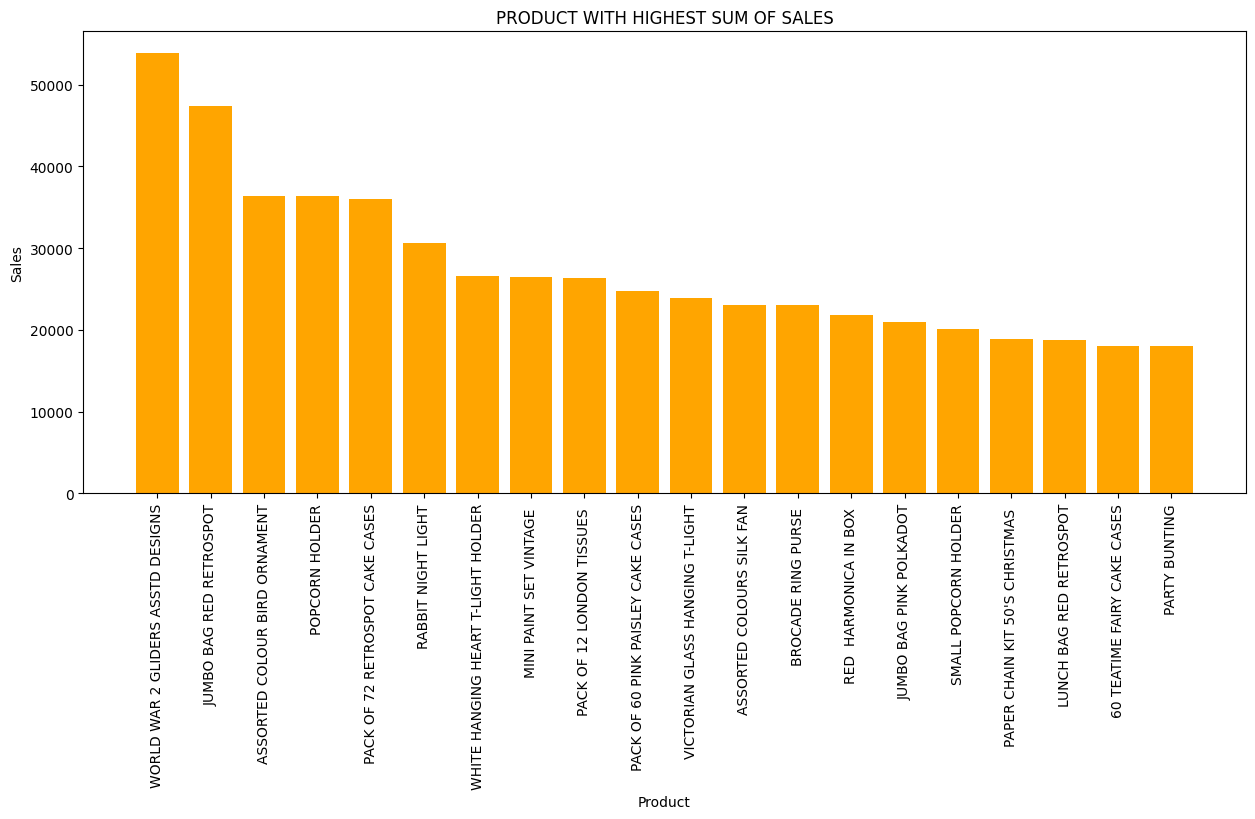

In [38]:
data_grouped_product = clean_data.groupby('Product')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(15, 6))

plt.bar(data_grouped_product['Product'][:20], data_grouped_product['Sales'][:20], color='orange')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('PRODUCT WITH HIGHEST SUM OF SALES')
plt.show()


PRODUCT WITH HIGHEST NUMBER OF TIMES PRODUCTS WERE SOLD

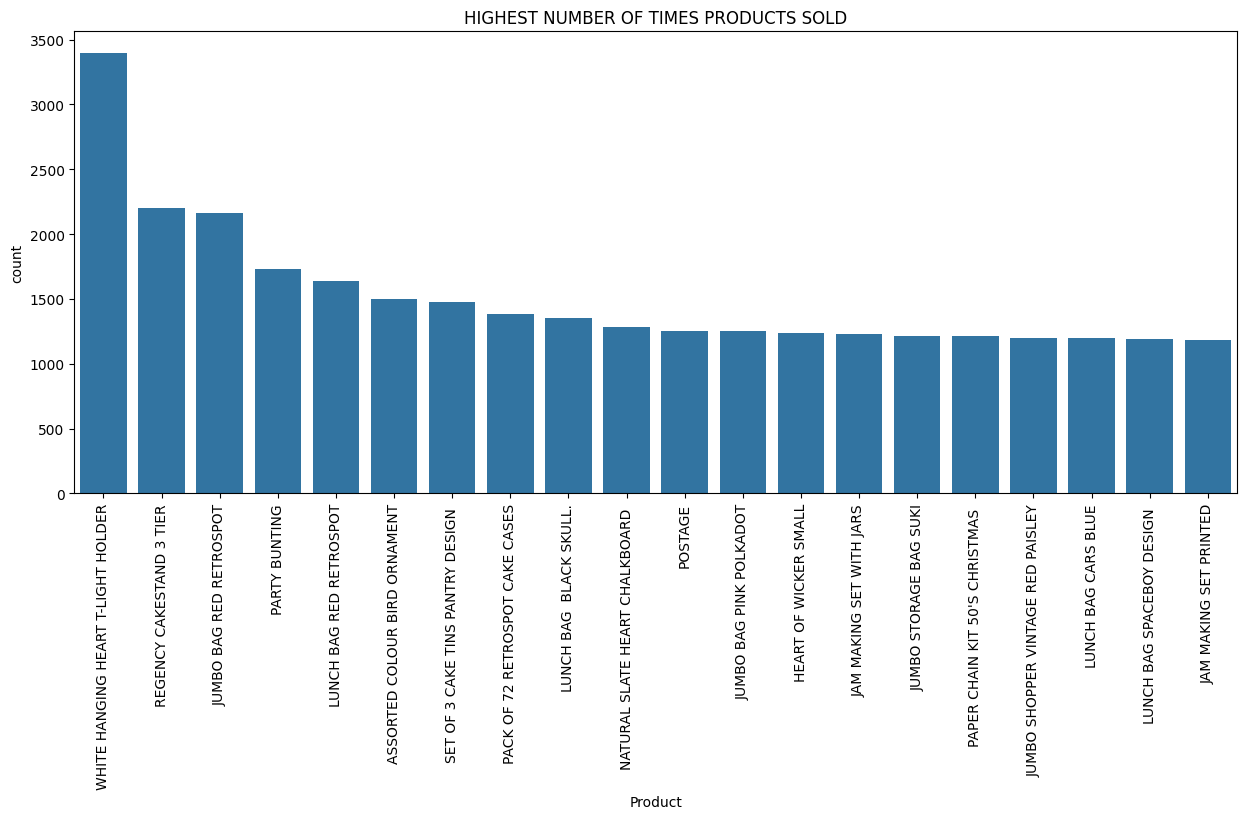

In [39]:
plt.figure(figsize= (15, 6))
graph = sns.countplot(x= 'Product', data= clean_data, order= clean_data.Product.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label
plt.xticks(rotation= 90)
plt.title('HIGHEST NUMBER OF TIMES PRODUCTS SOLD')
plt.show()

ALL SALES MADE IN EACH MONTH

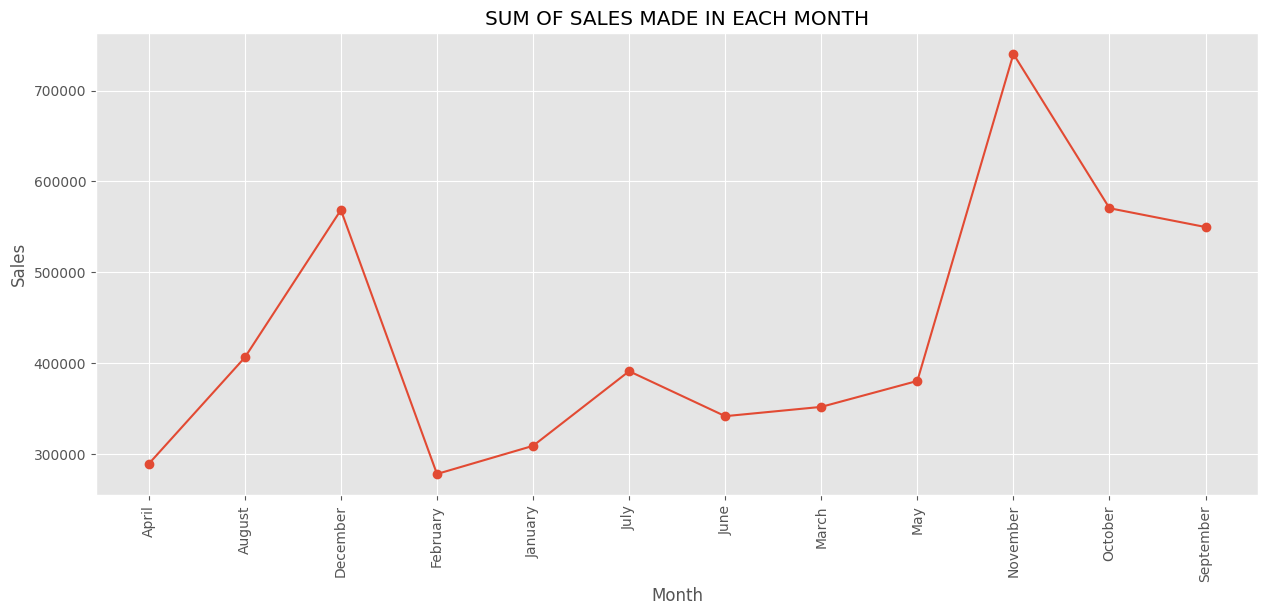

In [40]:
data_grouped = clean_data.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
plt.plot(data_grouped['Month'],data_grouped['Sales'], marker='o')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('SUM OF SALES MADE IN EACH MONTH')
plt.show()


COUNT PLOT SALES MADE IN EACH MONTH

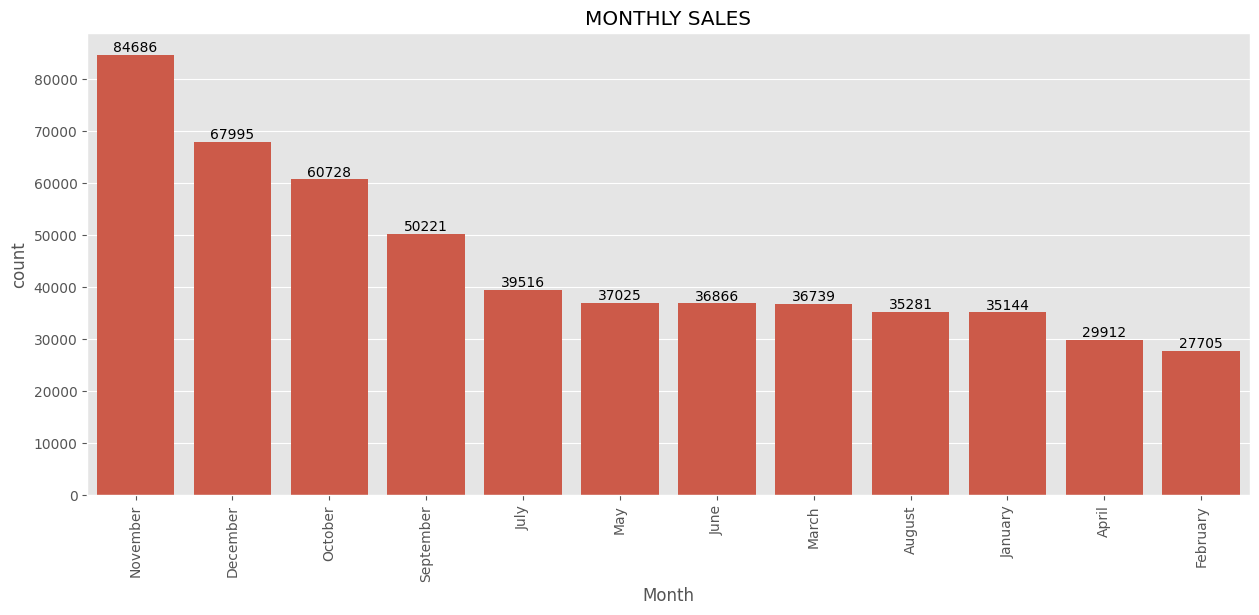

In [41]:
plt.figure(figsize=(15,6))
graph= sns.countplot(x= 'Month', data= clean_data, order= clean_data.Month.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.title('MONTHLY SALES')
plt.show()

SUM OF ALL PRODUCTS BOUGHT BY EACH COUNTRY

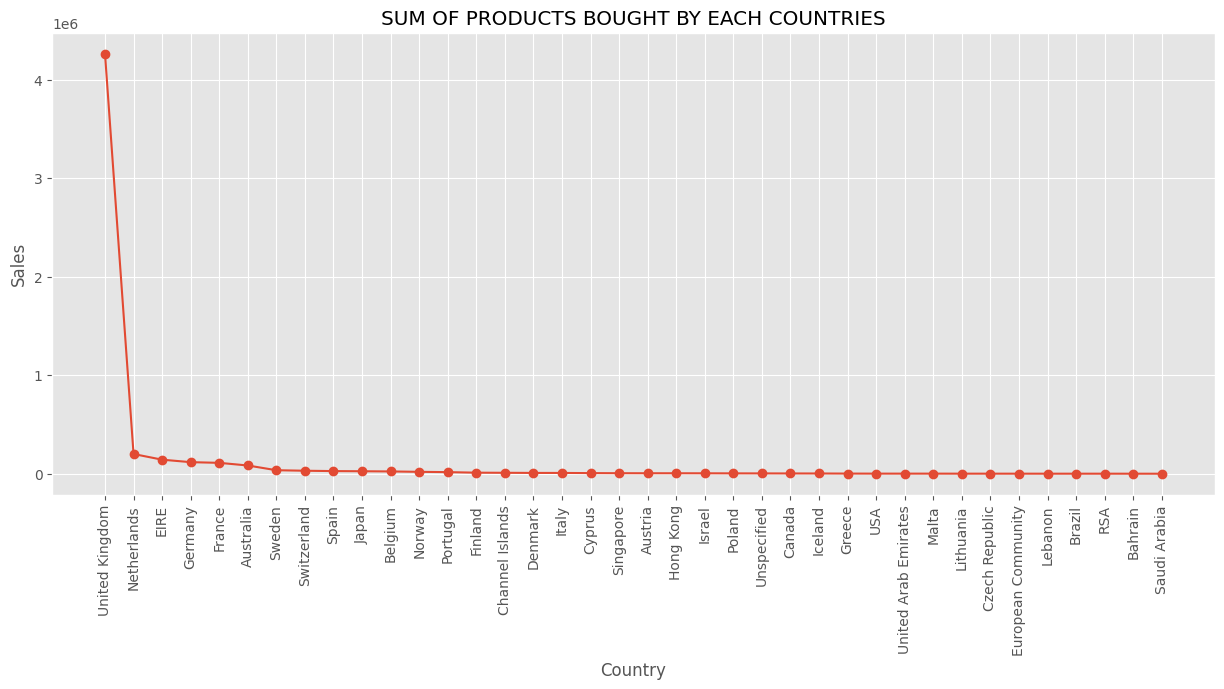

In [42]:
data_grouped_country = clean_data.groupby('Country')['Sales'].sum().reset_index()
data_grouped_country =  data_grouped_country.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(15, 6))

plt.plot(data_grouped_country['Country'], data_grouped_country['Sales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('SUM OF PRODUCTS BOUGHT BY EACH COUNTRIES')
plt.show()


COUNTRIES THAT BOUGHT THE MOST

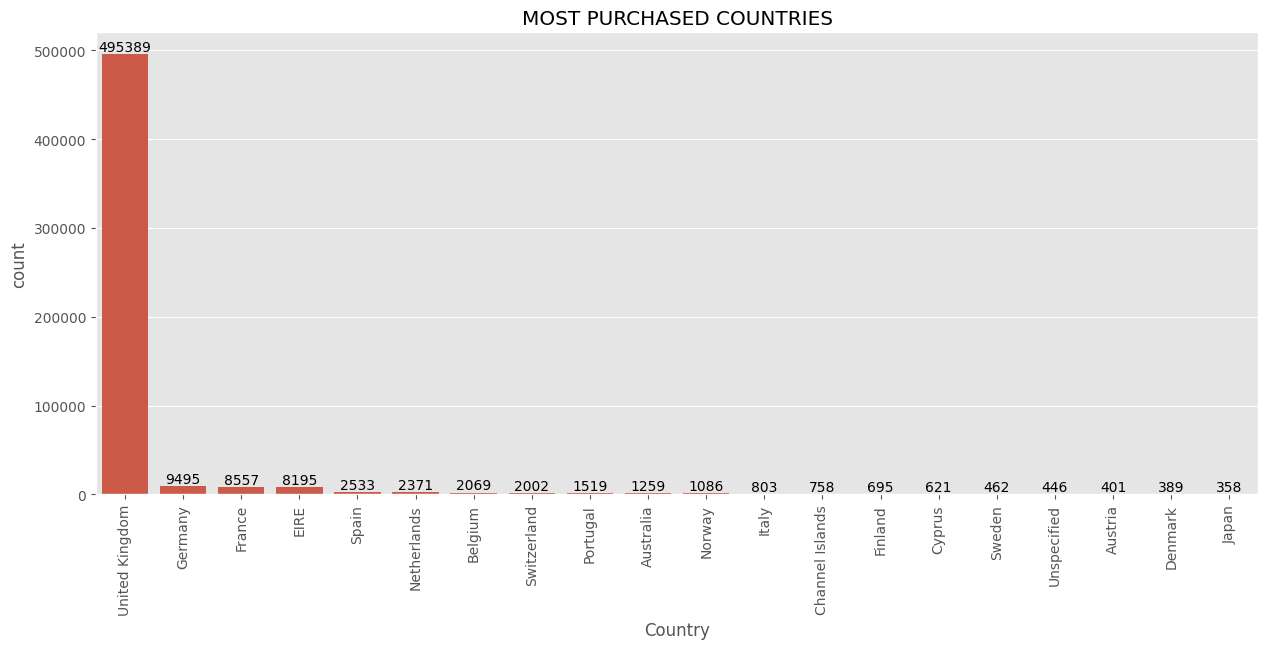

In [43]:
plt.figure(figsize=(15,6))
graph = sns.countplot(x='Country', data= clean_data, order= clean_data.Country.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.title('MOST PURCHASED COUNTRIES')
plt.show()

SALES MADE IN EACH YEAR USING LINEPLOT 

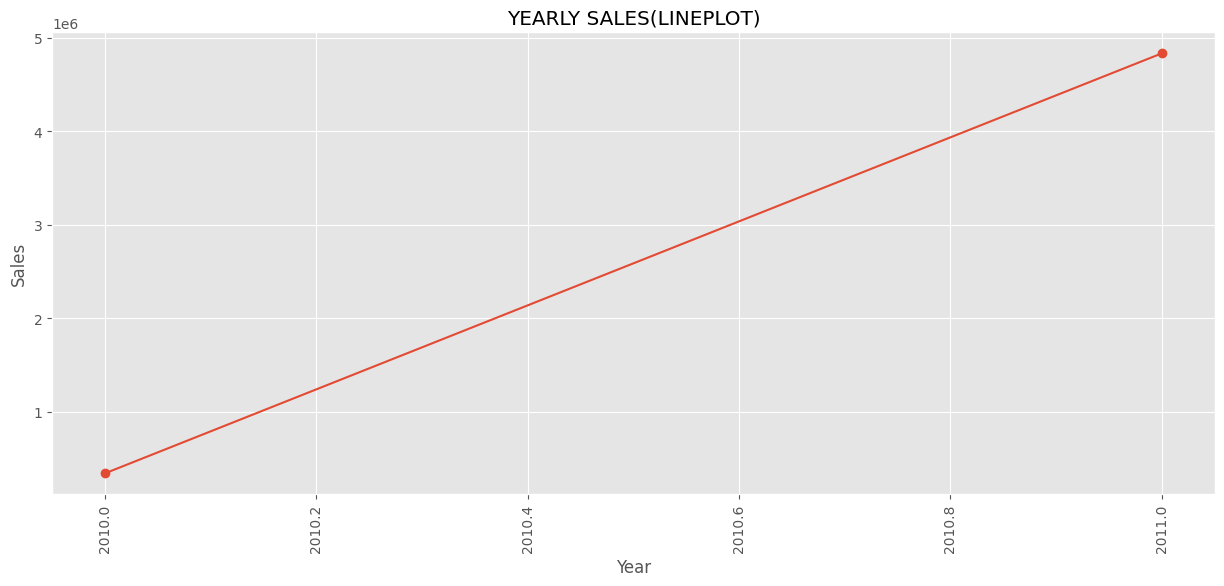

In [44]:
data_grouped_year = clean_data.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(15,6))

plt.plot(data_grouped_year['Year'], data_grouped_year['Sales'], marker = 'o')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('YEARLY SALES(LINEPLOT)')
plt.show()

SALES MADE IN EACH YEAR USING COUNTPLOT

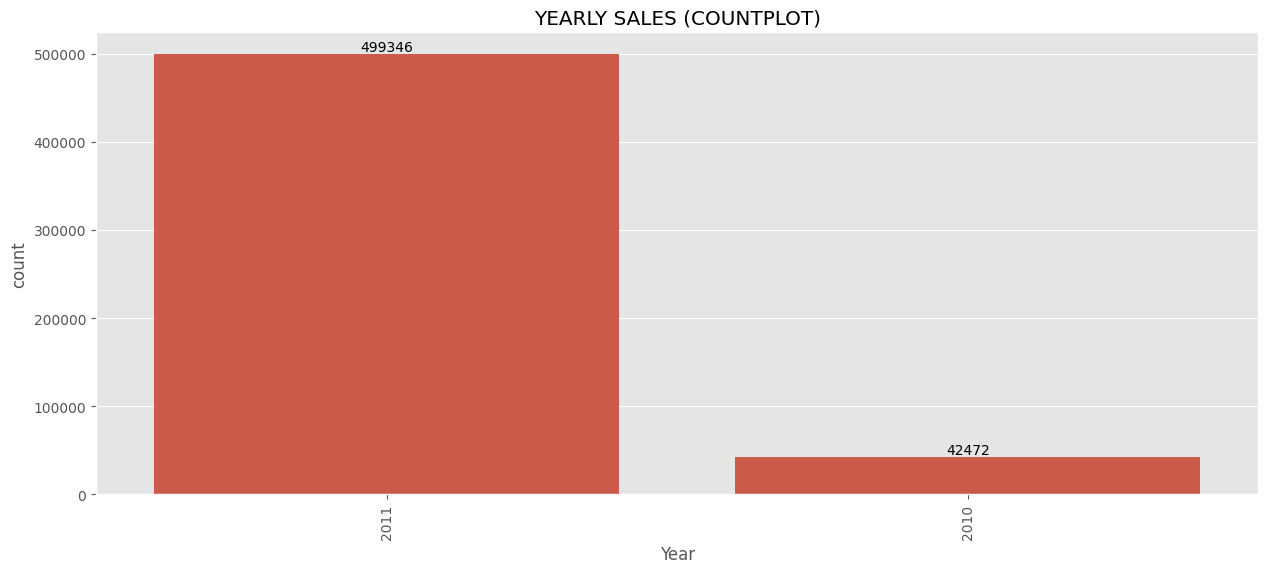

In [45]:
plt.figure(figsize=(15,6))
graph = sns.countplot(x='Year', data = clean_data, order= clean_data.Year.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.title('YEARLY SALES (COUNTPLOT)')
plt.show()


SUM OF MONEY FROM SALES THAT WAS MADE EACH SEASONS

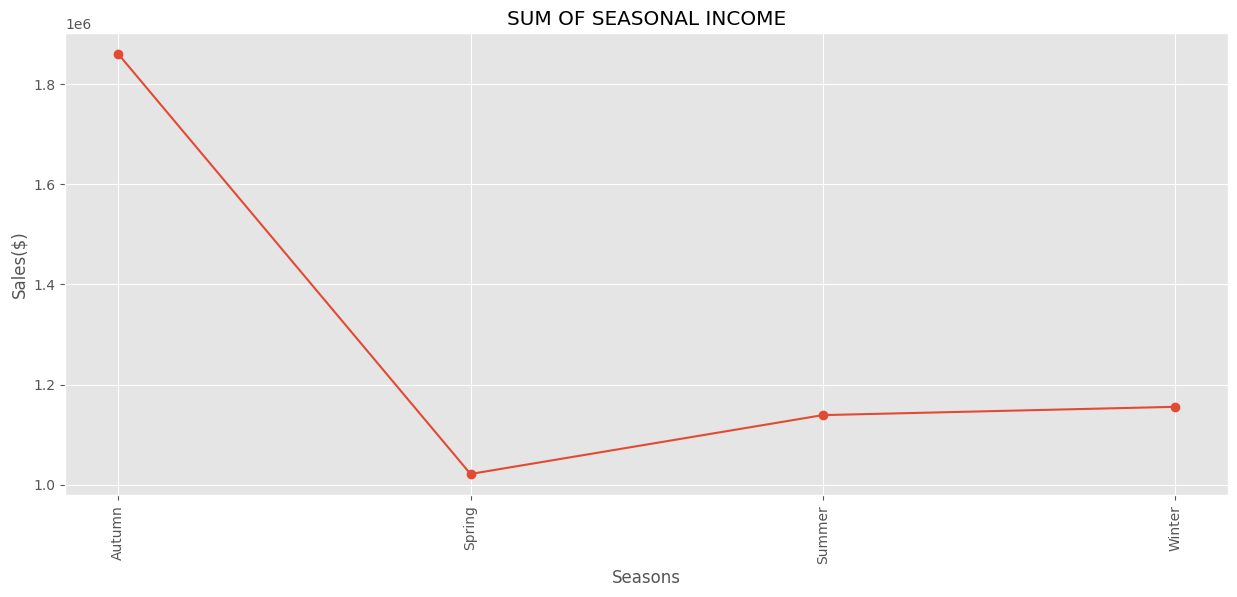

In [46]:
data_grouped_season = clean_data.groupby('Seasons')['Sales'].sum().reset_index()
plt.figure(figsize=(15,6))

plt.plot(data_grouped_season['Seasons'], data_grouped_season['Sales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Seasons')
plt.ylabel('Sales($)')
plt.title('SUM OF SEASONAL INCOME')
plt.show()

SALES MADE DURING EACH SEASON

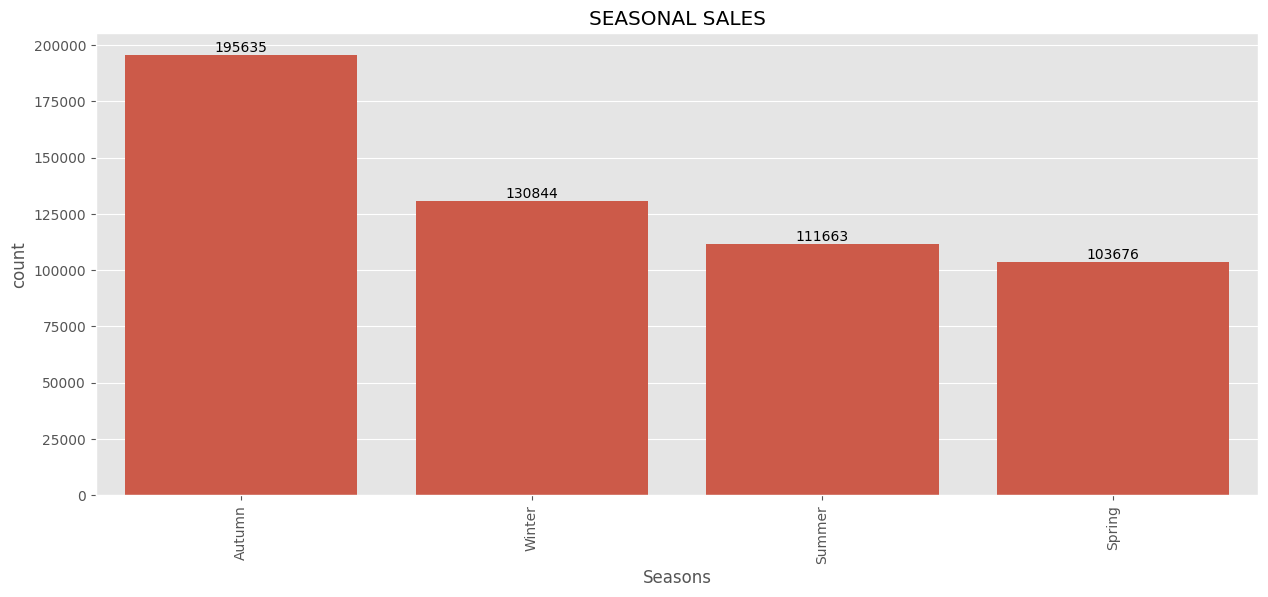

In [47]:
plt.figure(figsize=(15,6))
graph= sns.countplot(x= 'Seasons', data= clean_data, order= clean_data.Seasons.value_counts()[:20].index)
for x in graph.containers:
    graph.bar_label(x)
plt.xticks(rotation=90)
plt.title('SEASONAL SALES')
plt.show()

VISUALIZE OUTLIERS

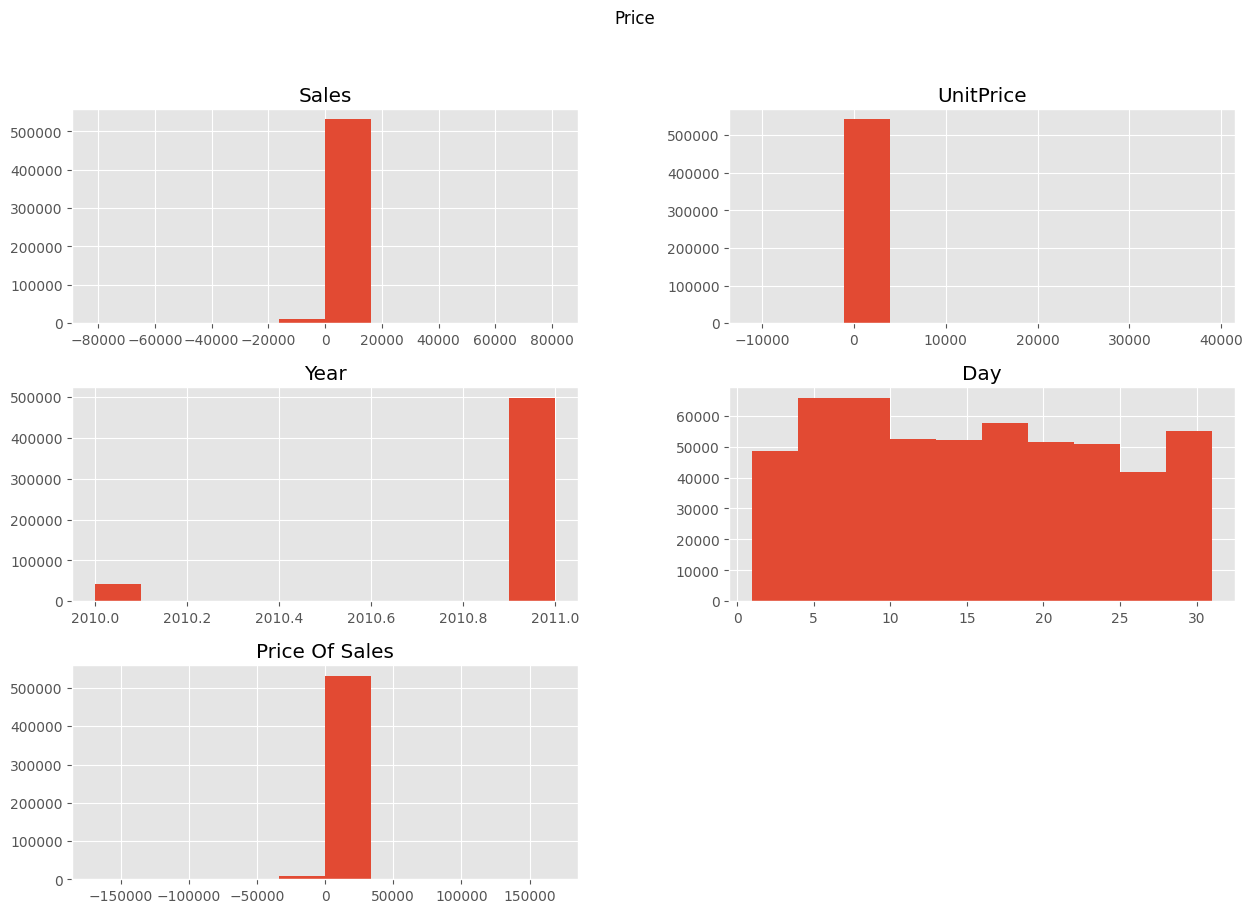

In [48]:
clean_data.hist(figsize=(15,10))
plt.suptitle('Price')
plt.show()

REMOVING OUTLIERS

In [49]:
# first of, separate numerical from categorical
numerical_columns = clean_data.select_dtypes(int)
new_data = pd.DataFrame(numerical_columns)

In [50]:
def remove_outliers (column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) &  (column <= upper_bound)]

#loop through each column and remove outliers

for col in clean_data.select_dtypes(int).columns:
    clean_data[col] = remove_outliers(clean_data[col])

# display the dataframe without outliers
new_data = clean_data

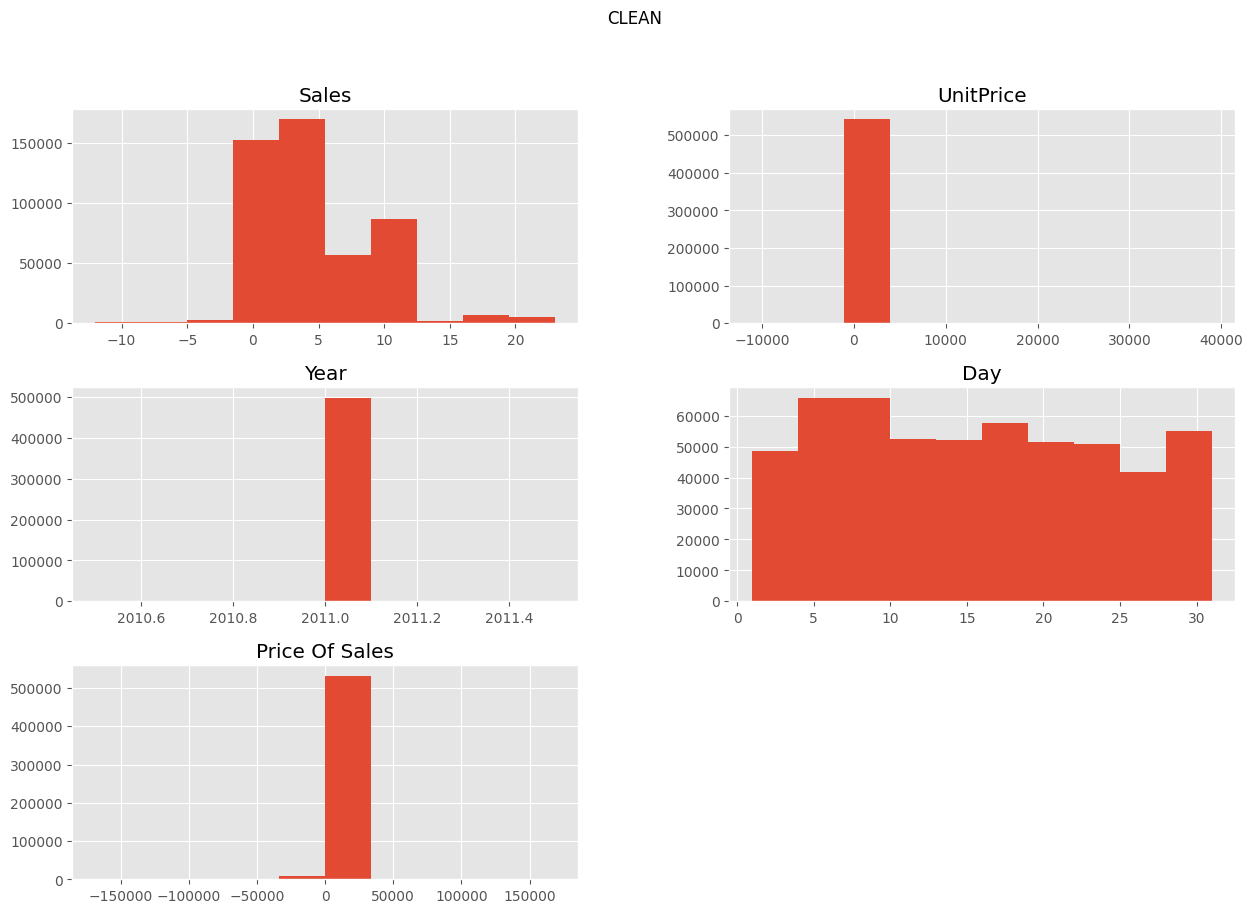

In [51]:
new_data.hist(figsize=(15,10))
plt.suptitle('CLEAN')
plt.show()

In [52]:
clean_data.head(60)

,StockCode,Product,Sales,UnitPrice,Country,Time,Year,Day,Month,Seasons,Price Of Sales
0,85123,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,08:26:00,NaN,1,December,Winter,15.30
1,71053,WHITE METAL LANTERN,6.0,3.39,United Kingdom,08:26:00,NaN,1,December,Winter,20.34
2,84406,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,United Kingdom,08:26:00,NaN,1,December,Winter,22.00
3,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,United Kingdom,08:26:00,NaN,1,December,Winter,20.34
4,84029,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,United Kingdom,08:26:00,NaN,1,December,Winter,20.34
5,22752,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,United Kingdom,08:26:00,NaN,1,December,Winter,15.30
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,4.25,United Kingdom,08:26:00,NaN,1,December,Winter,25.50
7,22633,HAND WARMER UNION JACK,6.0,1.85,United Kingdom,08:28:00,NaN,1,December,Winter,11.10
8,22632,HAND WARMER RED POLKA DOT,6.0,1.85,United Kingdom,08:28:00,NaN,1,December,Winter,11.10
9,84879,ASSORTED COLOUR BIRD ORNAMENT,NaN,1.69,United Kingdom,08:34:00,NaN,1,December,Winter,54.08


REMOVE NAN VALUES

In [53]:
data_cleaned_product = clean_data.dropna(subset=['Product'], inplace=True)

In [54]:
data_cleaned = clean_data.dropna(subset=['Sales'], inplace=True)

In [55]:
data_cleaned = clean_data.dropna(subset=['Year'], inplace=True)

REMOVE NEGATIVE VALUES 

In [56]:
clean_data['Sales'] = clean_data['Sales'].abs()

In [57]:
clean_data['Price Of Sales'] = clean_data['Price Of Sales'].abs()

In [58]:
clean_data.head(60)

,StockCode,Product,Sales,UnitPrice,Country,Time,Year,Day,Month,Seasons,Price Of Sales
42481,22386,JUMBO BAG PINK POLKADOT,10.0,1.95,United Kingdom,10:00:00,2011.0,4,January,Winter,19.50
42484,22379,RECYCLING BAG RETROSPOT,5.0,2.10,United Kingdom,10:00:00,2011.0,4,January,Winter,10.50
42485,20718,RED RETROSPOT SHOPPER BAG,10.0,1.25,United Kingdom,10:00:00,2011.0,4,January,Winter,12.50
42486,85099,JUMBO BAG RED RETROSPOT,10.0,1.95,United Kingdom,10:00:00,2011.0,4,January,Winter,19.50
42487,20682,RED RETROSPOT CHILDRENS UMBRELLA,6.0,3.25,United Kingdom,10:00:00,2011.0,4,January,Winter,19.50
42488,22961,JAM MAKING SET PRINTED,12.0,1.45,United Kingdom,10:00:00,2011.0,4,January,Winter,17.40
42489,22667,RECIPE BOX RETROSPOT,6.0,2.95,United Kingdom,10:00:00,2011.0,4,January,Winter,17.70
42490,22898,CHILDRENS APRON APPLES DESIGN,8.0,1.95,United Kingdom,10:00:00,2011.0,4,January,Winter,15.60
42491,22896,PEG BAG APPLES DESIGN,6.0,2.55,United Kingdom,10:00:00,2011.0,4,January,Winter,15.30
42492,22303,COFFEE MUG APPLES DESIGN,6.0,2.55,United Kingdom,10:00:00,2011.0,4,January,Winter,15.30


In [59]:
clean_data.shape

(444590, 11)